# Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Since the output is of binary type we will be using classifier algoritthms in this model

# Import Libraries

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
import joblib
import warnings
warnings.filterwarnings('ignore')

In [75]:
#loading the data
data=pd.read_csv("customerchurn.csv")

In [76]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
pd.set_option("display.max_columns",None)

In [78]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
data.shape

(7043, 21)

There are 7043 rows and 21 columns including the target variable 'Churn'. There are 20 feature columns

In [80]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

faeture_Columns = 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
        
        
        
Label_column/target - 'Churn'

In [81]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are datatypes like int, float and objects in the dataset. The categorical data needs to be encoded. The Total charges are in numeric for which datatype can be changed

Let us analyse each and every column

we have int and object datatypes. Label column that is churn is of object type which need to encoded using label encoder.

# EDA Process

In [82]:
#target variable
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

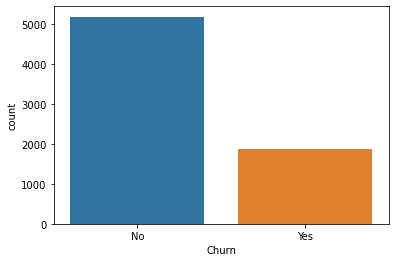

In [83]:
sns.countplot(x=data['Churn'])

we see that we have no values higher than yes values

Let us explore each and every column one by one 

In [84]:
data['customerID'].value_counts()

4365-MSDYN    1
8063-RJYNF    1
5364-XYIRR    1
4829-ZLJTK    1
7825-GKXMW    1
             ..
7126-RBHSD    1
6691-CCIHA    1
9867-NNXLC    1
6870-ZWMNX    1
7013-PSXHK    1
Name: customerID, Length: 7043, dtype: int64

This seems to be unique value for each and every row . so we can drop this column

In [85]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

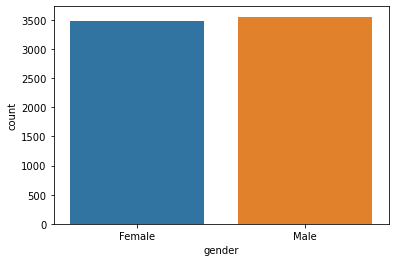

In [86]:
sns.countplot(x=data['gender'])

we have nearly equal count of male and female categories data

we can use encode it using encoding technique

In [87]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

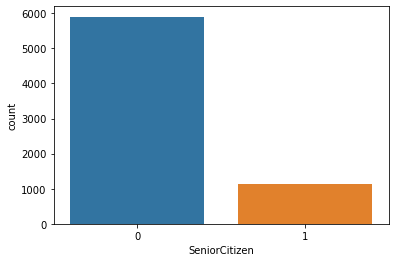

In [88]:
sns.countplot(x=data['SeniorCitizen'])

we need not encode it as it is already in numeric terms

In [89]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

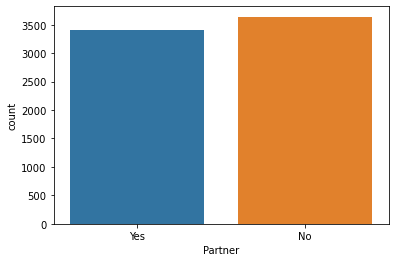

In [90]:
sns.countplot(data['Partner'])

It is of binary type data. we need to encode it

In [91]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [92]:
coll=['Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [93]:
#creating function to check remaining columns

def count(col):
    print(data[col].value_counts())
    sns.countplot(data[col])

No     4933
Yes    2110
Name: Dependents, dtype: int64


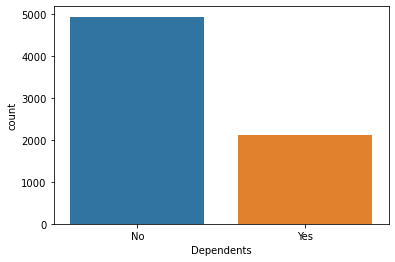

In [94]:
count('Dependents')

Yes    6361
No      682
Name: PhoneService, dtype: int64


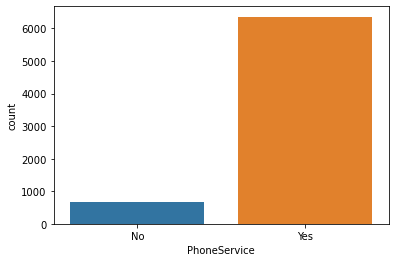

In [95]:
count(coll[2])

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


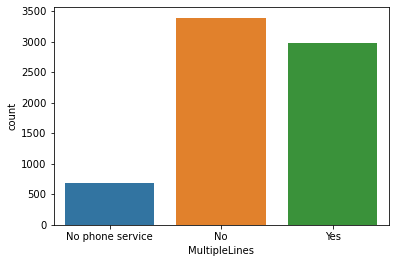

In [96]:
count(coll[3])

This have 3 data category. we can encode it using onehot encoder

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


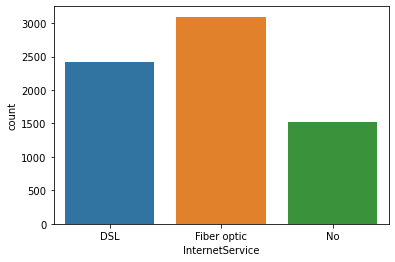

In [97]:
count(coll[4])

This have 3 category types. we can encode it 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


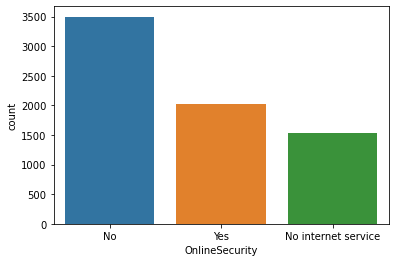

In [98]:
count(coll[5])

This have 3 category types. we can encode it 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


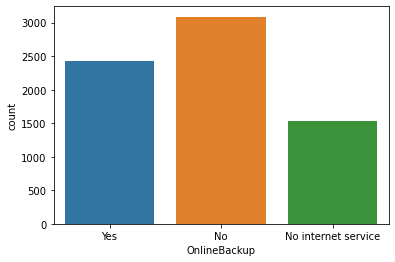

In [99]:
count(coll[6])

This have 3 category types. we can encode it 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


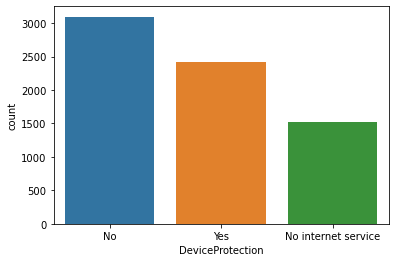

In [100]:
count(coll[7])

This have 3 category types. we can encode it

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


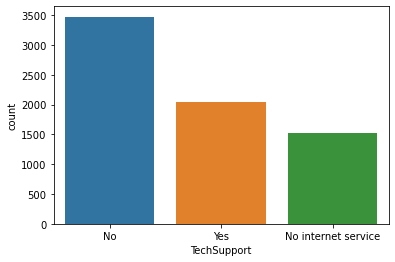

In [101]:
count(coll[8])

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


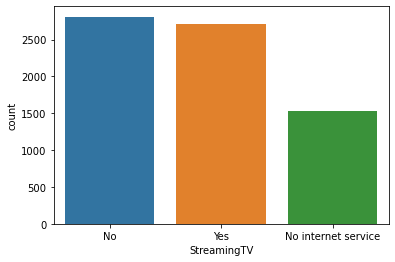

In [102]:
count(coll[9])

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


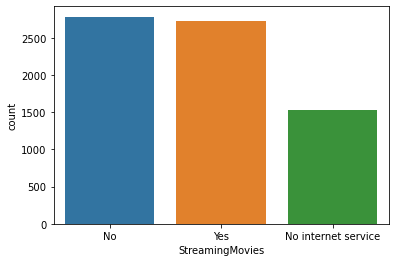

In [103]:
count(coll[10])

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


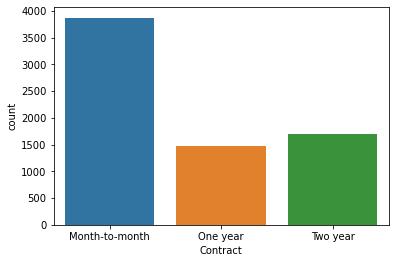

In [104]:
count(coll[11])

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


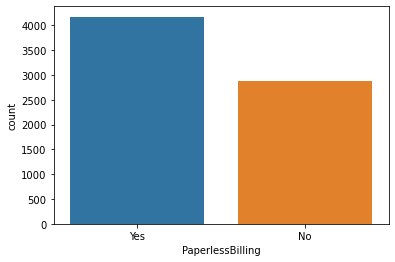

In [105]:
count(coll[12])

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


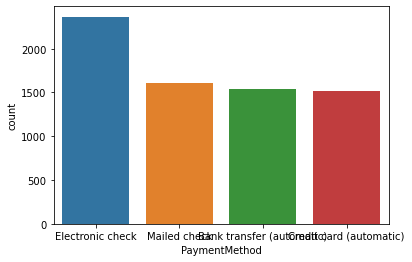

In [106]:
count(coll[13])

we have mostly yes/no data or atlernatiovely third category data. we can use Labe Encoder and one hot encoder technique to encode the categorical data

In [107]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [108]:
#dropping useless data
data.drop('customerID',axis=1,inplace=True)

# Missing Values

In [109]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

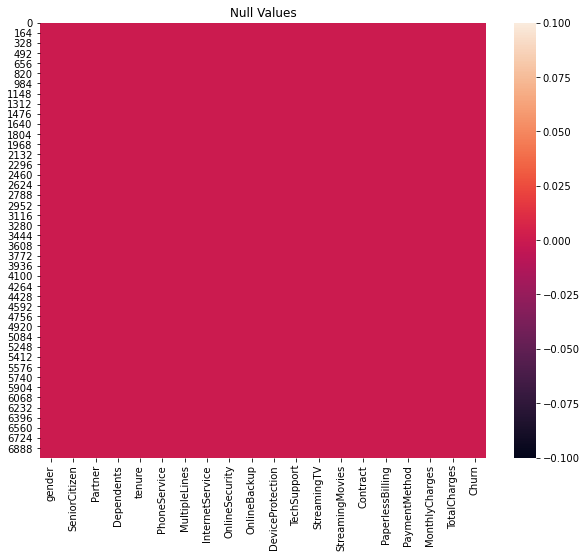

In [110]:
#heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

There are no null values in the dataset

In [111]:
#TotalCharges
data['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
40.1        1
8013.55     1
780.2       1
657.5       1
401.1       1
Name: TotalCharges, Length: 6531, dtype: int64

In [112]:
data[(data['TotalCharges'] == ' ')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


we have spaces in TotalCharges which is making the column as object. let us remove it

In [113]:
#let us replace the value as median value
data['TotalCharges'] = np.where(data['TotalCharges'] == ' ',0, data['TotalCharges'])

In [114]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [115]:
data['TotalCharges'].median()

1394.55

In [116]:
data['TotalCharges']=data['TotalCharges'].replace(0,1400.55)

In [117]:
data['TotalCharges'].value_counts()

1400.55    12
20.20      11
19.75       9
20.05       8
19.65       8
           ..
1534.05     1
1066.15     1
249.95      1
8333.95     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [118]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [119]:
#Finding categorical value
column=[column for column in data.columns if data[column].dtype=='object']
column

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [120]:
#finding the continous value 
cont_col=[cont_col for cont_col in data.columns if data[cont_col].dtype!='object']
cont_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Encoding data

In [121]:
#encoding Label using Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Churn']=LE.fit_transform(data['Churn'])

In [122]:
#Encoding feature columns using Ordinal Encoder  
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
data['gender']=OE.fit_transform(data['gender'].values.reshape(-1,1))
data['Partner']=OE.fit_transform(data['Partner'].values.reshape(-1,1))
data['Dependents']=OE.fit_transform(data['Dependents'].values.reshape(-1,1))
data['PhoneService']=OE.fit_transform(data['PhoneService'].values.reshape(-1,1))
data['MultipleLines']=OE.fit_transform(data['MultipleLines'].values.reshape(-1,1))
data['InternetService']=OE.fit_transform(data['InternetService'].values.reshape(-1,1))
data['OnlineSecurity']=OE.fit_transform(data['OnlineSecurity'].values.reshape(-1,1))
data['OnlineBackup']=OE.fit_transform(data['OnlineBackup'].values.reshape(-1,1))
data['DeviceProtection']=OE.fit_transform(data['DeviceProtection'].values.reshape(-1,1))
data['TechSupport']=OE.fit_transform(data['TechSupport'].values.reshape(-1,1))
data['StreamingTV']=OE.fit_transform(data['StreamingTV'].values.reshape(-1,1))
data['Contract']=OE.fit_transform(data['Contract'].values.reshape(-1,1))
data['PaperlessBilling']=OE.fit_transform(data['PaperlessBilling'].values.reshape(-1,1))

In [123]:
#one hot encoding for non ordinal data
data = pd.get_dummies(data, columns=['PaymentMethod'], prefix=['PaymentMethod'])

In [124]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,No,0.0,1.0,29.85,29.85,0,0,0,1,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,No,1.0,0.0,56.95,1889.50,0,0,0,0,1
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,No,0.0,1.0,53.85,108.15,1,0,0,0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,No,1.0,0.0,42.30,1840.75,0,1,0,0,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,70.70,151.65,1,0,0,1,0


In [125]:
data['StreamingMovies']=OE.fit_transform(data['StreamingMovies'].values.reshape(-1,1))

In [126]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85,0,0,0,1,0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,56.95,1889.50,0,0,0,0,1
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,53.85,108.15,1,0,0,0,1
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,42.30,1840.75,0,1,0,0,0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.70,151.65,1,0,0,1,0


In [127]:
data.dtypes

gender                                     float64
SeniorCitizen                                int64
Partner                                    float64
Dependents                                 float64
tenure                                       int64
PhoneService                               float64
MultipleLines                              float64
InternetService                            float64
OnlineSecurity                             float64
OnlineBackup                               float64
DeviceProtection                           float64
TechSupport                                float64
StreamingTV                                float64
StreamingMovies                            float64
Contract                                   float64
PaperlessBilling                           float64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
PaymentMethod_Bank transfer (au

Now we have int and float datatypes

# Statistical Summary

In [128]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,64.761692,2281.921731,0.265370,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,30.090047,2265.268526,0.441561,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,70.350000,1400.550000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000


Most of the data is pretty clean because of categorical data. Count is same. we need to check on columns like tenure,MonthlyCharges and TotalCharges which are continous. There are possible outliers in Total Charges as mean>median.

The count is same in all datum. There are possible marginal outliers in some of the columns .The mean and median looks like in range apart from categorical data.The standard deviation of all data is seen clearly. we can further check for skewness and outliers through visualization and can treat efficiently.

# Correlation Check

In [129]:
datacor=data.corr()

In [130]:
datacor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,-0.014569,-0.000002,-0.008612,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,0.220173,0.102651,0.150889,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,0.096848,0.318366,-0.150448,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.113890,0.063597,-0.164221,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,0.247900,0.825462,-0.352229,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,0.247398,0.113012,0.011942,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.433576,0.452850,0.038037,0.076293,0.064939,0.086121,-0.235566
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,-0.323260,-0.175588,-0.047291,-0.017581,-0.032540,-0.091881,0.152481
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.053878,0.253936,-0.289309,0.099084,0.122220,-0.254689,0.068992
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,0.119777,0.375064,-0.195525,0.092990,0.098545,-0.133810,-0.037698


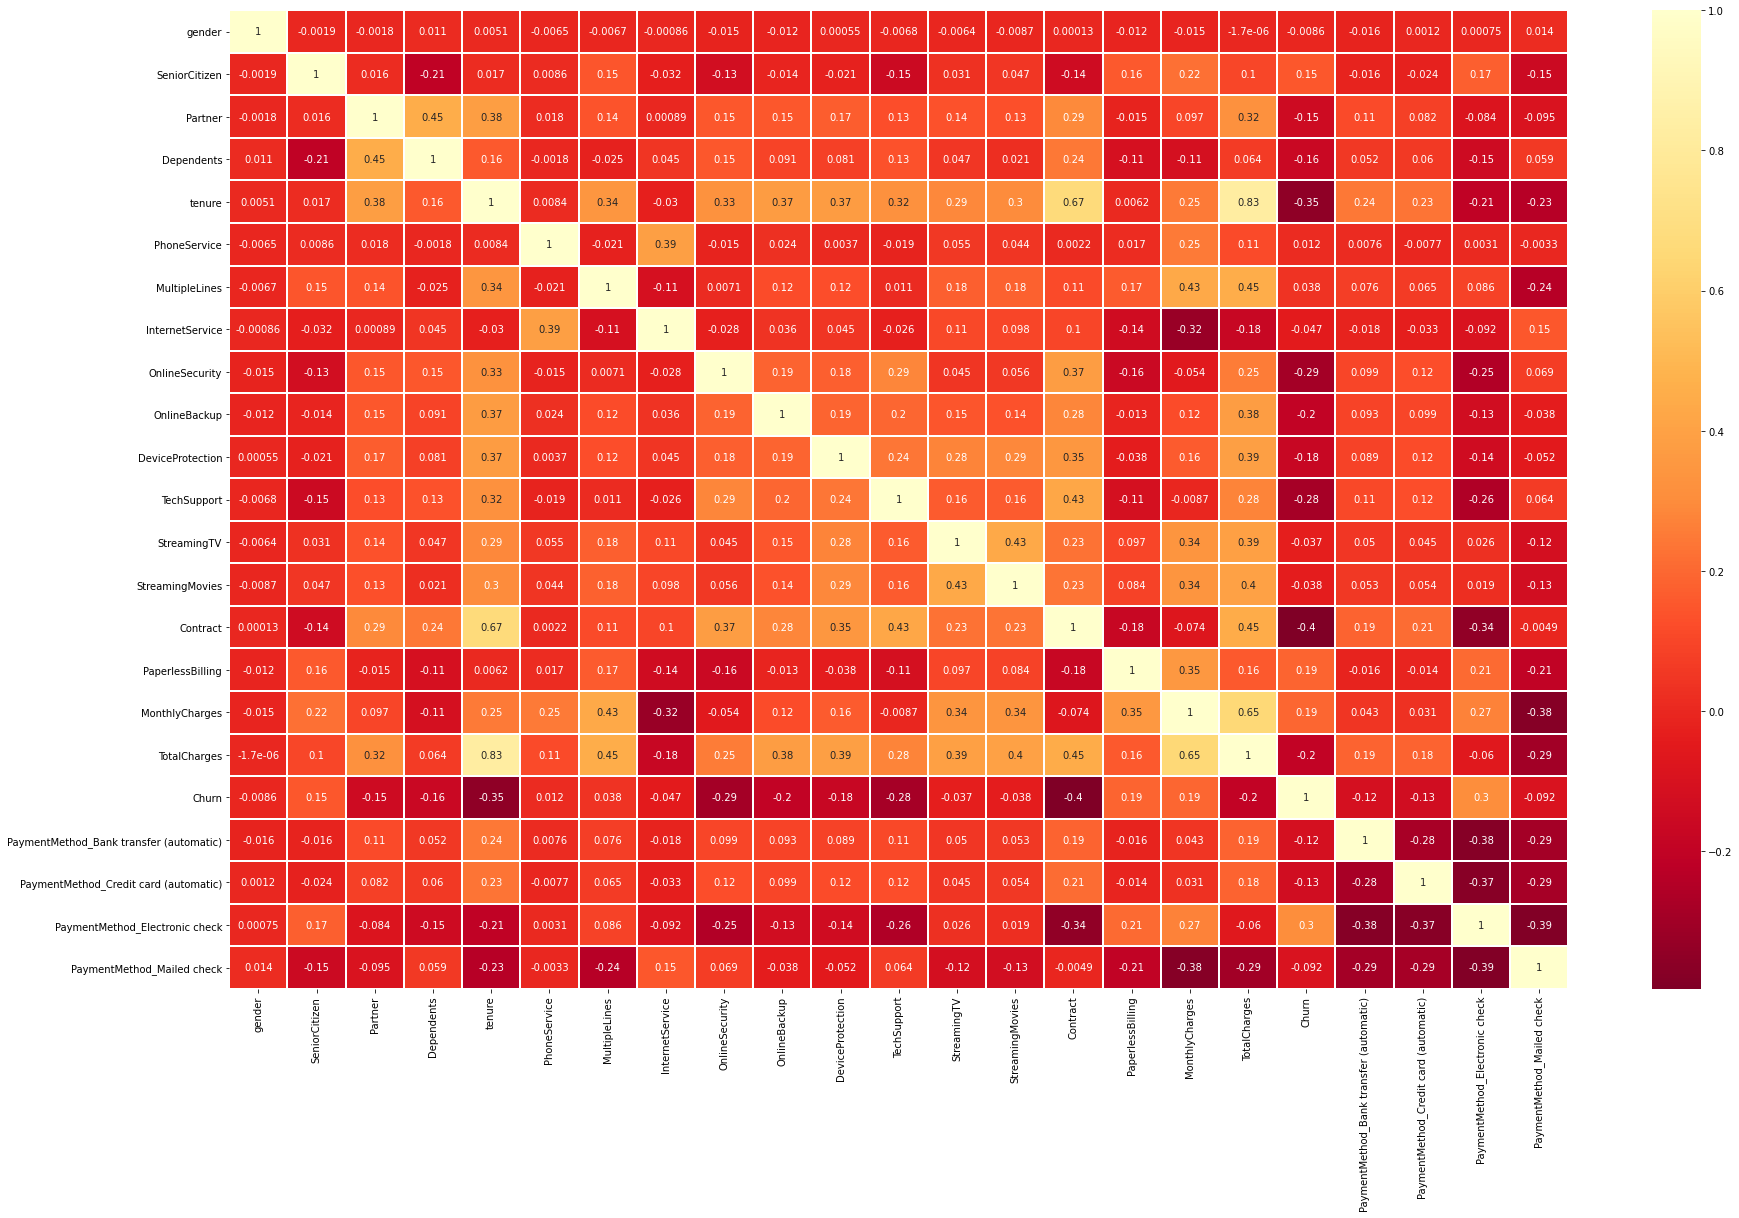

In [131]:
plt.figure(figsize=(30,18))
sns.heatmap(datacor,cmap='YlOrRd_r',linewidth=1,annot=True)

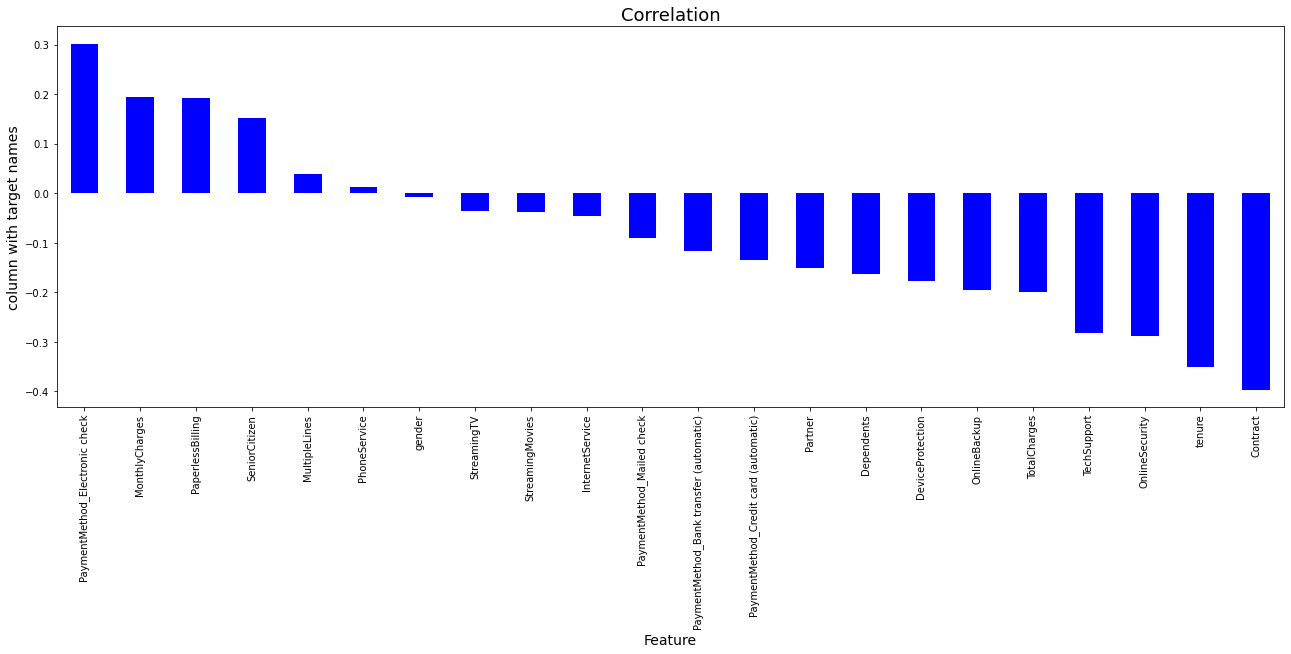

In [132]:
plt.figure(figsize=(22,7))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='blue')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

Paymenymethod_Electronic check  is highly positively correlated to Churn. Contract are highly negatively correlated to Churn

we can see correlation between all the columns from the heatmap

# Distribution of data : Skewness

In [133]:
cont_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

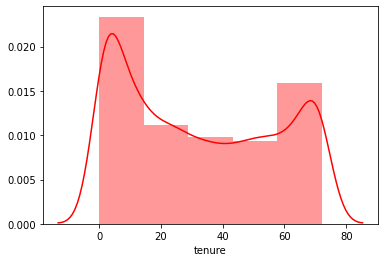

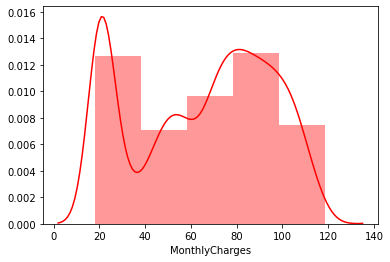

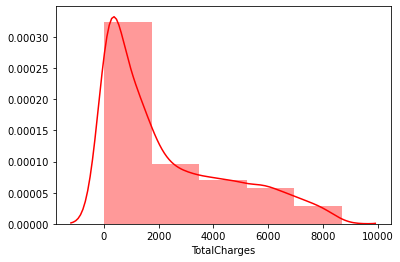

In [136]:
#checking skewness through visulaization for columns individually

def dtp(a):
    plt.figure()
    sns.distplot(data[cont_col[a]],color='red',bins=5)
    
for i in range(1,4):
    dtp(i)

Tenure amd Monthly charges look fine. Total charges is slighlty right skewed. we can remove it if needed

# Detecting Outliers

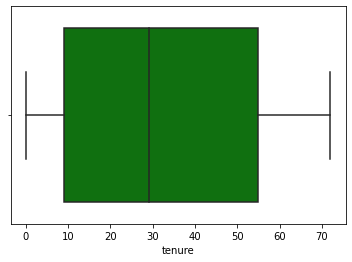

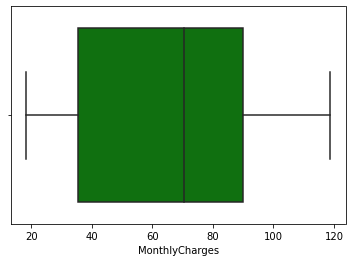

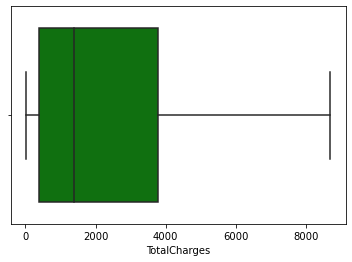

In [138]:
def bxplt(a):
    plt.figure()
    sns.boxplot(data[cont_col[a]],color='green')
    
for i in range(1,4):
    bxplt(i)

we don't have outliers in any of the continous data

Let us have a overall visualization of spread of data using pairplot

# Checking distribution relationship

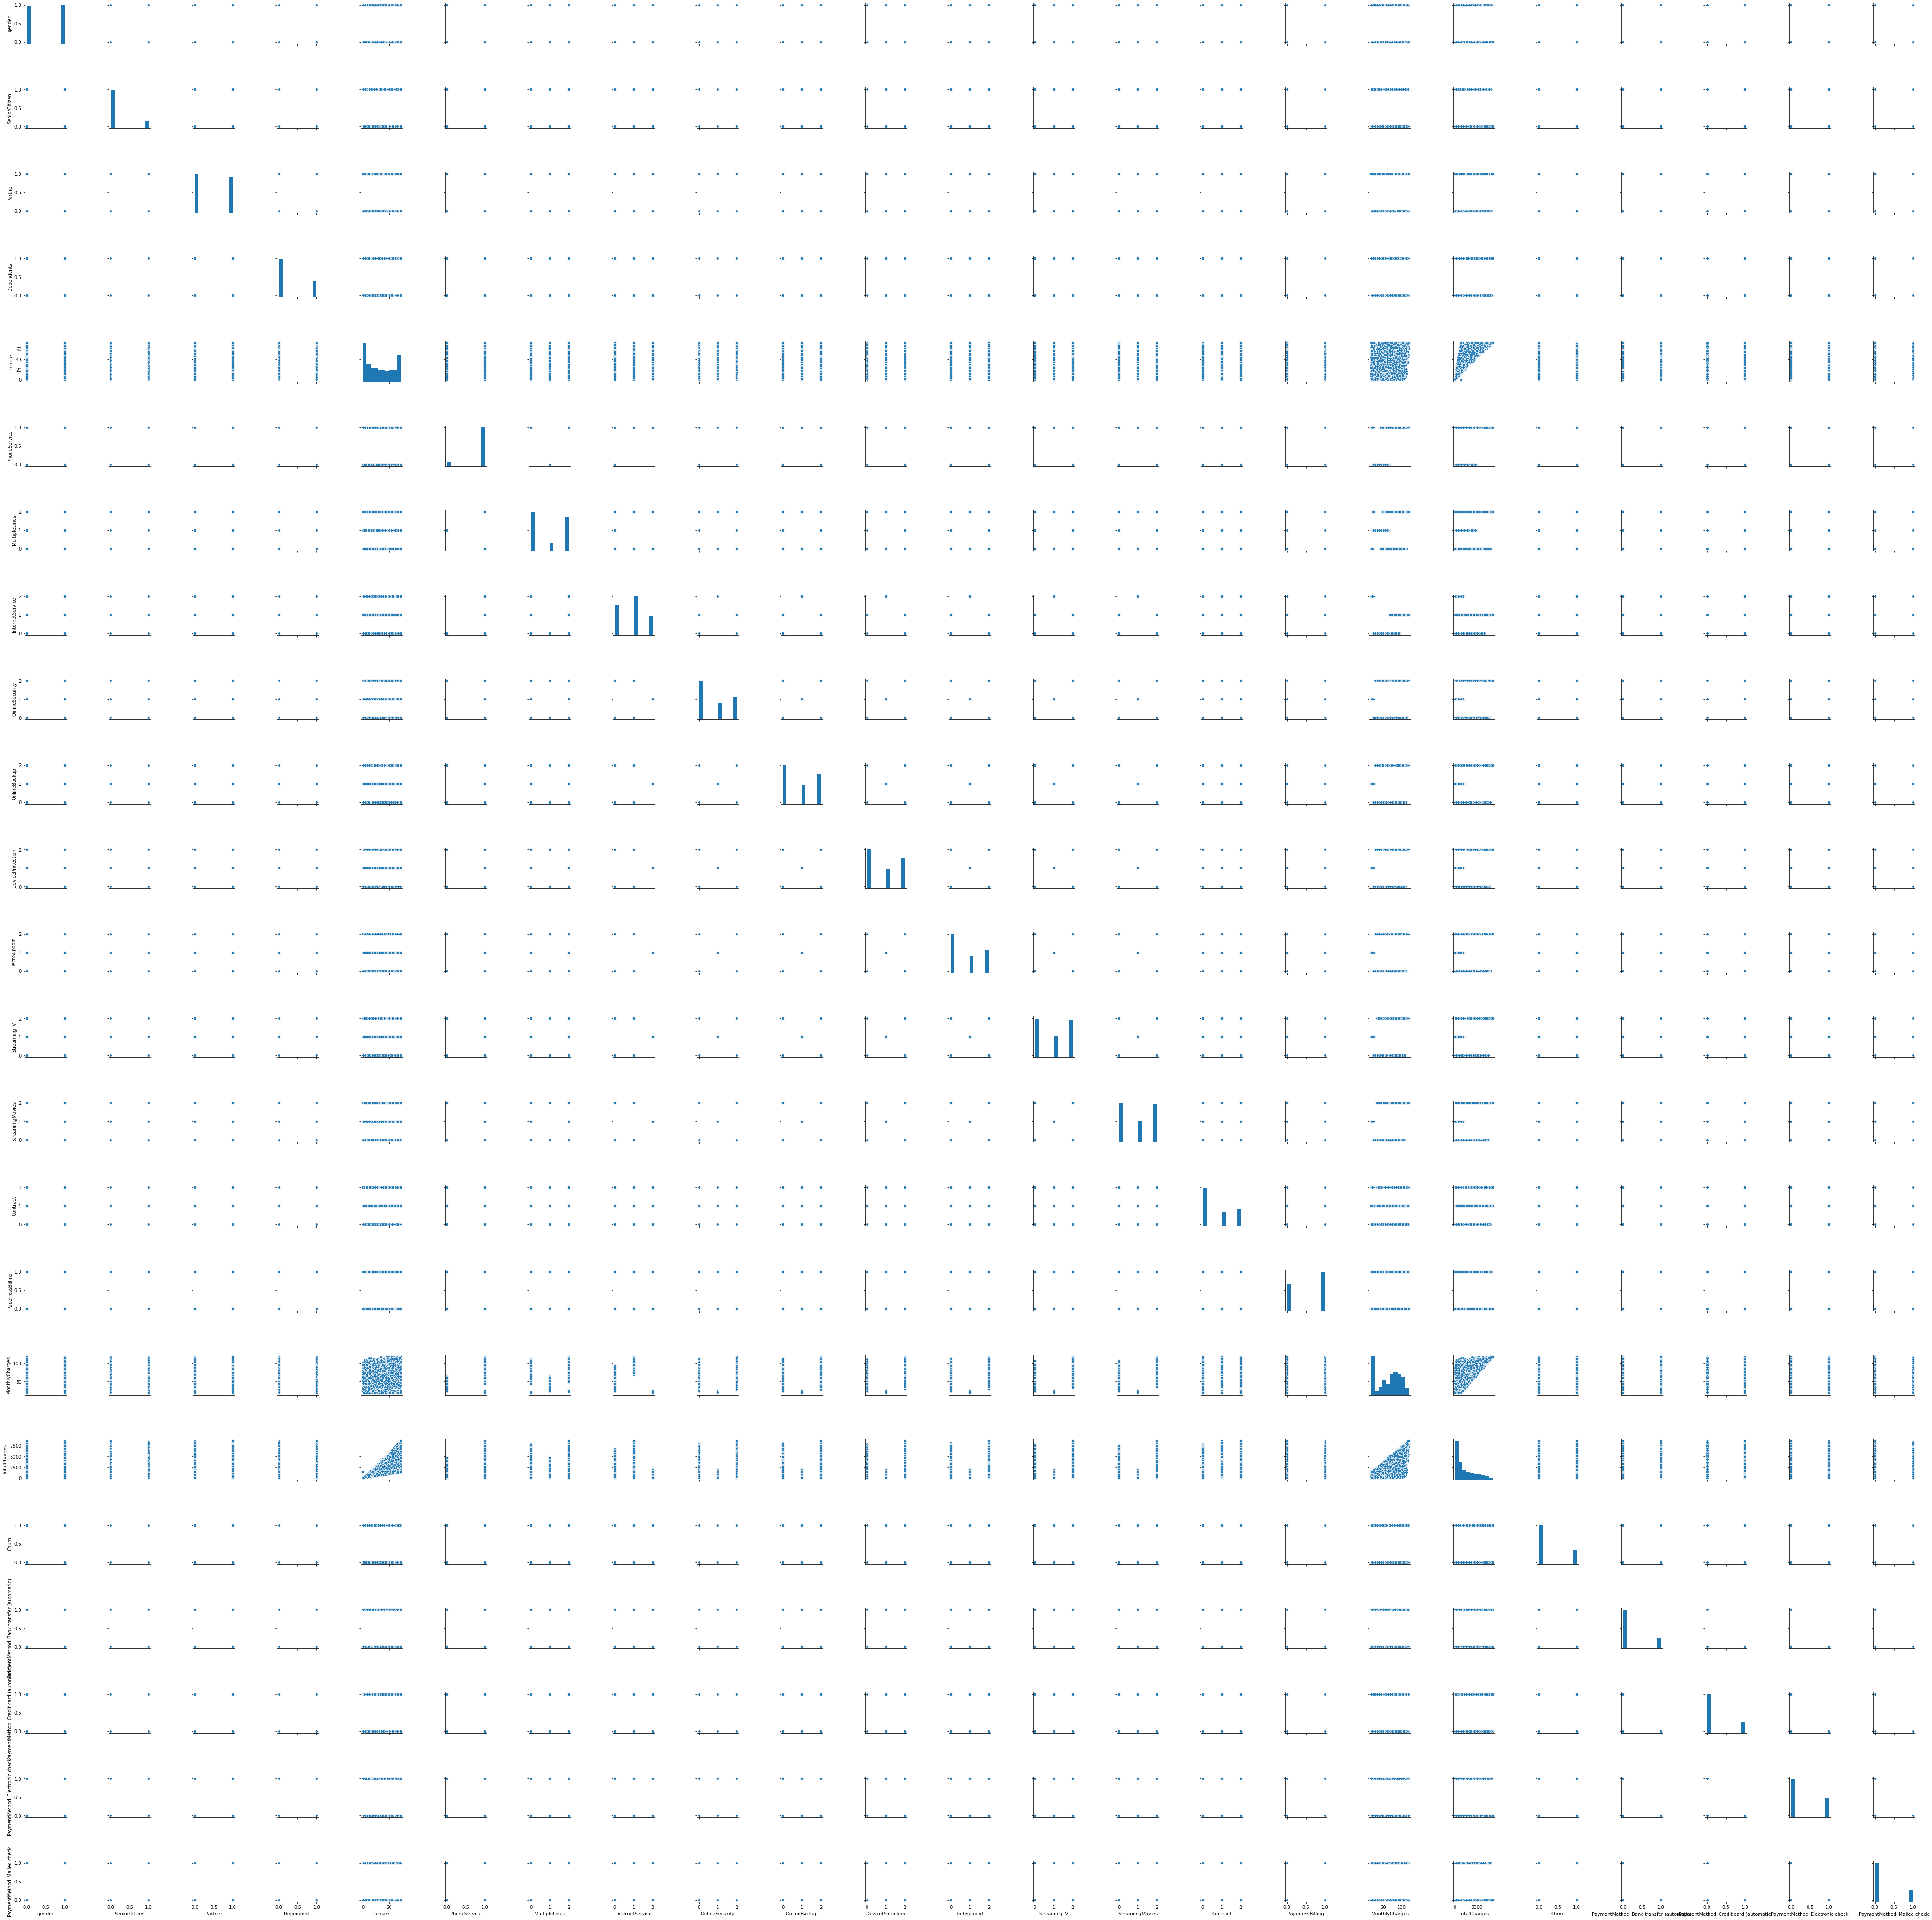

In [139]:
sns.pairplot(data)

scattering of data on entire dataset

No columns dropped as of now. we will drop further if necessary after checking multicollinearity

We need not remove outliers. As we didn't find any outliers in any of the continous data

# Skewness Removal

In [140]:
data['tenure'].skew()

0.2395397495619829

In [142]:
data['MonthlyCharges'].skew()

-0.22052443394398033

In [143]:
data['TotalCharges'].skew()

0.9637860876689562

In [147]:
data['TotalCharges']=np.sqrt(data['TotalCharges'])

In [148]:
data['TotalCharges'].skew()

0.30983101076591457

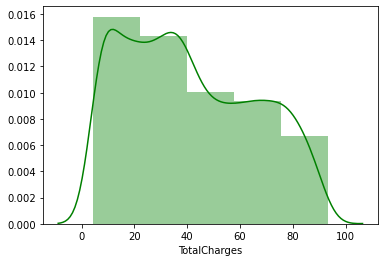

In [149]:
sns.distplot(data['TotalCharges'],color='green',bins=5)

skewness removed succesfully

In [156]:
#initialising x and y

x=data.drop('Churn',axis=1)
y=data['Churn']

In [157]:
#checking multicollinearity after dropping multicollinear columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

m=x.copy()
SC=StandardScaler()
X=SC.fit_transform(m)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns

In [158]:
vif.round(1)

,vif,features
0,1.0,gender
1,1.2,SeniorCitizen
2,1.5,Partner
3,1.4,Dependents
4,14.8,tenure
5,1.6,PhoneService
6,1.4,MultipleLines
7,1.9,InternetService
8,1.3,OnlineSecurity
9,1.2,OnlineBackup


In [159]:
x.drop('TotalCharges',axis=1,inplace=True)

In [160]:
#checking multicollinearity after dropping multicollinear columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

m=x.copy()
SC=StandardScaler()
X=SC.fit_transform(m)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns

In [161]:
vif.round(1)

,vif,features
0,1.0,gender
1,1.2,SeniorCitizen
2,1.5,Partner
3,1.4,Dependents
4,2.8,tenure
5,1.6,PhoneService
6,1.4,MultipleLines
7,1.8,InternetService
8,1.3,OnlineSecurity
9,1.2,OnlineBackup


Since the tenure,monthlycharges and Totalcharges are multicorrelated. Totalcharges are dropped from the dataset

All the vif>5. Therefore we have no multicollinear column

All the data cleaning process is done. The dataset is ready for modelling

-----------------------------------------------------END OF EDA----------------------------------------------------------------------------------------------------

# Model Building

In [162]:
#scaling data as it contains both int and float
SC=StandardScaler()
X=SC.fit_transform(x)
x=pd.DataFrame(X,columns=x.columns)

In [163]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,-1.160323,-0.529885,-0.525047,1.406418,-0.544807
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,-0.259629,-0.529885,-0.525047,-0.711026,1.835513
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,-0.362660,-0.529885,-0.525047,-0.711026,1.835513
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-0.746535,1.887201,-0.525047,-0.711026,-0.544807
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.197365,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,0.665992,-0.529885,-0.525047,-0.711026,1.835513
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,1.277533,-0.529885,1.904590,-0.711026,-0.544807
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,-1.168632,-0.529885,-0.525047,1.406418,-0.544807
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.320338,-0.529885,-0.525047,-0.711026,1.835513


In [164]:
x.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
Contract                                   0
PaperlessBilling                           0
MonthlyCharges                             0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
dtype: int64

In [165]:
x.shape

(7043, 21)

In [166]:
y.shape

(7043,)

In [167]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [168]:
#finding best random_state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.818494623655914  on random_state  178


In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=178)

In [170]:
x_train.shape

(4718, 21)

In [171]:
x_test.shape

(2325, 21)

In [172]:
# different algorithm going to use for classifier

lg=LogisticRegression(multi_class='multinomial')
gnb=GaussianNB()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
gd=GradientBoostingClassifier()

In [173]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    
    print("accuracy score is :",accuracy_score(y_test,pred))
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [174]:
#calling function to run model

eval(lg)

LogisticRegression(multi_class='multinomial')
accuracy score is : 0.818494623655914


Confusion Matrix : 
 [[1559  159]
 [ 263  344]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1718
           1       0.68      0.57      0.62       607

    accuracy                           0.82      2325
   macro avg       0.77      0.74      0.75      2325
weighted avg       0.81      0.82      0.81      2325



Logistic Regression has an accuracy of 81.84%

In [175]:
eval(gnb)

GaussianNB()
accuracy score is : 0.764731182795699


Confusion Matrix : 
 [[1331  387]
 [ 160  447]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1718
           1       0.54      0.74      0.62       607

    accuracy                           0.76      2325
   macro avg       0.71      0.76      0.72      2325
weighted avg       0.80      0.76      0.77      2325



GuassianNB has an accuracy of 76.47%

In [176]:
eval(sv)

SVC()
accuracy score is : 0.8060215053763441


Confusion Matrix : 
 [[1580  138]
 [ 313  294]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.83      0.92      0.88      1718
           1       0.68      0.48      0.57       607

    accuracy                           0.81      2325
   macro avg       0.76      0.70      0.72      2325
weighted avg       0.79      0.81      0.79      2325



SVC has an accuracy of 80.60%

In [177]:
eval(dtc)

DecisionTreeClassifier()
accuracy score is : 0.7221505376344086


Confusion Matrix : 
 [[1388  330]
 [ 316  291]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1718
           1       0.47      0.48      0.47       607

    accuracy                           0.72      2325
   macro avg       0.64      0.64      0.64      2325
weighted avg       0.72      0.72      0.72      2325



DecisionTreeClassifier has an accuracy of 72.21%

In [178]:
eval(rf)

RandomForestClassifier()
accuracy score is : 0.7819354838709678


Confusion Matrix : 
 [[1539  179]
 [ 328  279]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1718
           1       0.61      0.46      0.52       607

    accuracy                           0.78      2325
   macro avg       0.72      0.68      0.69      2325
weighted avg       0.77      0.78      0.77      2325



RandomForest has an accuracy of 78.19%

In [179]:
eval(ad)

AdaBoostClassifier(n_estimators=100)
accuracy score is : 0.8086021505376344


Confusion Matrix : 
 [[1543  175]
 [ 270  337]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1718
           1       0.66      0.56      0.60       607

    accuracy                           0.81      2325
   macro avg       0.75      0.73      0.74      2325
weighted avg       0.80      0.81      0.80      2325



Adaboost Classifier has an accuracy of 80.86%

In [180]:
eval(gd)

GradientBoostingClassifier()
accuracy score is : 0.8103225806451613


Confusion Matrix : 
 [[1549  169]
 [ 272  335]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1718
           1       0.66      0.55      0.60       607

    accuracy                           0.81      2325
   macro avg       0.76      0.73      0.74      2325
weighted avg       0.80      0.81      0.80      2325



Gradient Boosting Classifier has an accuracy of 81.03%

LogisticRegression,Adaboostclassifier,Gradientboostingclassifier is giving good accuracy of 80-81%. Let us finalize the model using Cross validation score

we have few models of good accuracy but we can finalize the model using Cross_validation. The minimum value difference between the accuracy score and cross validation score gives us the best model

# Cross_Validation

In [181]:
model=[lg,gnb,sv,dtc,rf,ad,gd]

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print(m,"Cross val score is ",score)
    print("mean is ",score.mean())

LogisticRegression(multi_class='multinomial') Cross val score is  [0.80340667 0.81121363 0.78637331 0.80184659 0.79971591]
mean is  0.8005112224982257
GaussianNB() Cross val score is  [0.76721079 0.75372605 0.74662881 0.7578125  0.75284091]
mean is  0.7556438116975289
SVC() Cross val score is  [0.80198722 0.80340667 0.78211498 0.79758523 0.79971591]
mean is  0.7969620015807471
DecisionTreeClassifier() Cross val score is  [0.73740241 0.73243435 0.7310149  0.71306818 0.72727273]
mean is  0.7282385153880895
RandomForestClassifier() Cross val score is  [0.79701916 0.78708304 0.76224273 0.79545455 0.796875  ]
mean is  0.7877348941867217
AdaBoostClassifier(n_estimators=100) Cross val score is  [0.80695529 0.80340667 0.79701916 0.80752841 0.80326705]
mean is  0.8036353151816247
GradientBoostingClassifier() Cross val score is  [0.81192335 0.80766501 0.7828247  0.80823864 0.80113636]
mean is  0.8023576117814052


Difference between model score and cross validation score

lg=1.79
gnb=0.91
sv=0.91
dtc=0.61
rf=0.58
ad=0.50
gd=0.80

By comparing both cross validation accuracy and actual accuracy. It is found that Ada Boost Classifier is the best model with a difference of 0.5%.

# AdaBoostClassifier model is the best model with 80.86 % accuracy

we will try to improve accuracy by hypertuning

In [183]:
ad.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [185]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [50, 100,150,200],'learning_rate' : [0.01,0.05,0.1,0.3,1]}
rand_search = RandomizedSearchCV(ad,param_distributions=params, cv = 5,n_jobs=-1)

In [186]:
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [50, 100, 150, 200]})

In [187]:
rand_search.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}

In [193]:
hadc = AdaBoostClassifier(n_estimators=200,learning_rate=0.1)
hadc.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [194]:
eval(hadc)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
accuracy score is : 0.8124731182795699


Confusion Matrix : 
 [[1558  160]
 [ 276  331]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1718
           1       0.67      0.55      0.60       607

    accuracy                           0.81      2325
   macro avg       0.76      0.73      0.74      2325
weighted avg       0.80      0.81      0.81      2325



In [195]:
hadc.score(x_train,y_train)

0.8020347604917338

In [196]:
hadc.score(x_test,y_test)

0.8124731182795699

In [198]:
score=cross_val_score(hadc,x,y,cv=5)
print(hadc,"Cross val score is ",score)
print("mean is ",score.mean())

AdaBoostClassifier(learning_rate=0.1, n_estimators=200) Cross val score is  [0.81618169 0.80837473 0.78637331 0.8046875  0.80326705]
mean is  0.8037768565713919


Therefore it is not a overfitted model

The hyper parameter tuning of support vector classifier gives actual accuracy of 81.24 % and cross val of 80.37 %. Since there is accuracy increase of ~1% for hypertuned parameter. The hypertuned model of AdaBoostClassfier algorithm is selected for final output. Since Hyperparamter tuning taking a lot of time, it is performed only for top model to see whether it is improving the accuracy.

# AdaBoostClassifier hypertuned model with true accuracy 81.24%  is selected as final model for execution

# AUC_ROC CURVE

In [199]:
#code for AUC_ROC CURVE

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve 

def auc_roc(mod):
    plot_roc_curve(mod,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

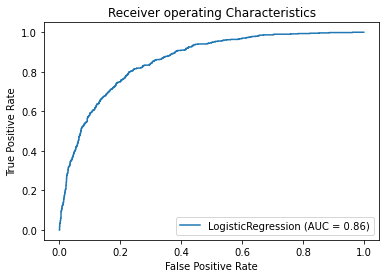

In [200]:
auc_roc(lg)

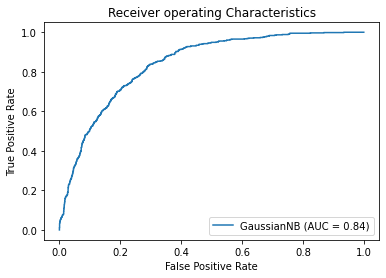

In [201]:
auc_roc(gnb)

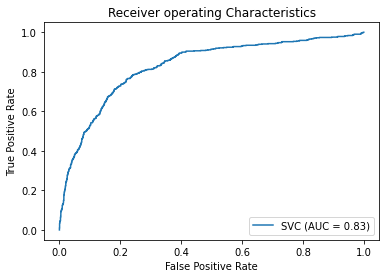

In [202]:
auc_roc(sv)

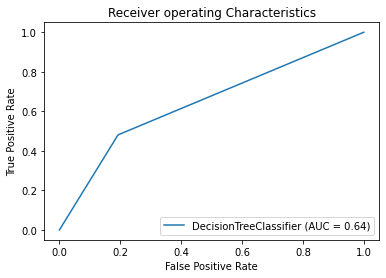

In [203]:
auc_roc(dtc)

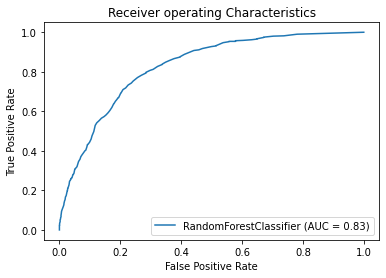

In [204]:
auc_roc(rf)

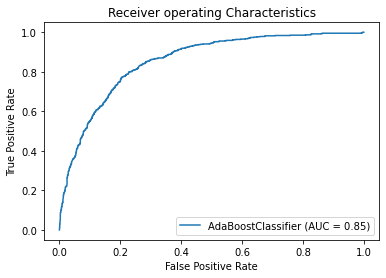

In [205]:
auc_roc(ad)

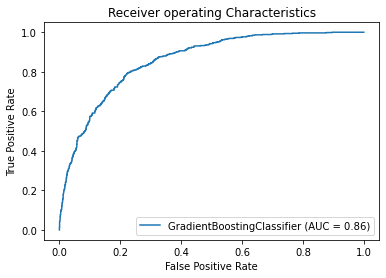

In [206]:
auc_roc(gd)

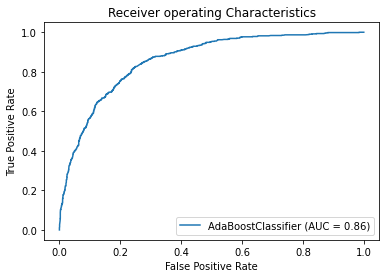

In [207]:
auc_roc(hadc)

we can see that the Area under curve is 86% for AdaboostClassifier hypertuned model

The area under curve is high for AdaBoostClassifier(hypertuned paramter) with AUC score of 0.86. That means 86% of area under curve is covered in this model.

AdaBoostClassifier (hypertuned) Model is the final model with an accuracy of 81.24%

As seen above, AdaBoostClassifier (hadc) (hypertuned) covers the maximum area. Therefore adaboost classifier is selected as the final model with true accuracy of 81.24%

# Conclusion

In [208]:
joblib.dump(hadc,"hadc_CustomerChurn_prediction.obj")

['hadc_CustomerChurn_prediction.obj']

In [209]:
#Lets Check loading the file 

Churn_prediction=joblib.load("hadc_CustomerChurn_prediction.obj")

In [210]:
Churn_prediction.score(x_test,y_test)

0.8124731182795699

In [211]:
pred=hadc.predict(x_test)
Conclusion=pd.DataFrame([Churn_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [212]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

we can see it is giving exact data as result. The model is working well

The datas predicted are perfectly matching. The jobfile created is working well almost giving good accuracy.

After Training and Testing seven algorithm model. The best accuracy model was determined as AdaBoostClassifier (hypertuned model) with 81.24% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.

Customer churn  yes or no prediction can be easily predicted now through this model

# Model Created Succesfully